数据集大小： 1000
数据集大小： 1
数据集大小： 1


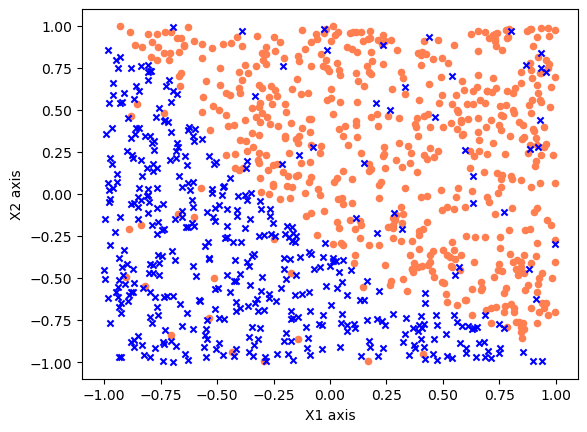

回归系数 [3.14129907 2.91620111] [0.5518978]
准确率 0.8766666666666667


In [11]:
# 逻辑斯谛回归

import matplotlib.pyplot as plt
import numpy as np

lines = np.loadtxt('lr_dataset.csv', delimiter=',', dtype=float)
x_total = lines[:, 0:2]
y_total = lines[:, 2]
print('数据集大小：', len(x_total))

pos_index = np.where(y_total == 1)
print('数据集大小：', len(pos_index))
neg_index = np.where(y_total == 0)
print('数据集大小：', len(neg_index))
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', color='coral', s=20)
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', color='blue', s=20)
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.show()

# 划分训练集与测试集
np.random.seed(0)
ratio = 0.7
split = int(len(x_total) * ratio)
idx = np.random.permutation(len(x_total))
x_total = x_total[idx]
y_total = y_total[idx]
x_train, y_train = x_total[:split], y_total[:split]
x_test, y_test = x_total[split:], y_total[split:]

from sklearn.linear_model import LogisticRegression

# 使用线性模型中的逻辑回归模型在数据集上训练
# 其提供的liblinear优化算法适合在较小数据集上使用
# 默认使用系数为1.0的L2正则化约束
# 其他可选参数请参考官方文档
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
print('回归系数', lr_clf.coef_[0], lr_clf.intercept_)

y_pred = lr_clf.predict(x_test)
print('准确率', np.mean(y_pred == y_test))
